In [1228]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1229]:
ATTACK_TARGET = "02"
MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = "../data" if MAIN else "../predata/anonymization_data"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [1230]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [1231]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,18,4,84,2,1,2,1,1,5,0,2,5,2,1,1,3
1,M,1,4,396,5,5,1,5,2,5,0,3,0,4,0,1,0
2,M,35,7,274,4,3,0,5,4,1,3,2,5,1,3,4,3
3,F,45,20,282,3,0,0,0,1,0,0,0,0,4,0,0,0
4,F,45,13,312,3,1,3,5,2,2,5,3,1,3,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,25,15,301,3,0,0,0,0,4,4,4,5,0,1,2,0
9996,F,35,18,940,3,0,0,0,5,4,3,0,0,3,0,0,5
9997,M,45,8,837,5,0,2,0,0,0,2,3,0,0,0,1,3
9998,M,18,9,201,2,4,0,2,0,0,0,0,3,0,0,0,0


### Ba, Bbの読み込み

In [1232]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Florie Lintall,F,18,17,373
1,Ring Delouch,M,50,12,826
2,Christos Morkham,M,50,0,180
3,Wye Zanutti,M,18,12,307
4,De witt Kertess,M,35,17,452


In [1233]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,3,0,2,1,0,3,0,2,0,2,...,1,2,3,4,0,2,0,3,5,2
1,0,0,2,1,3,2,3,0,1,2,...,2,0,4,0,5,0,0,0,0,4
2,0,1,0,1,1,1,0,0,4,0,...,4,0,0,0,0,0,2,5,0,0
3,0,0,1,5,0,1,0,2,0,0,...,3,0,3,0,*,0,0,5,3,5
4,3,0,0,5,0,0,0,4,0,4,...,4,0,2,0,3,0,2,0,0,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [1234]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [1235]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174,0,1,2,3,4,5
260,,,,,,
0,0.0213,0.0139,0.0168,0.0149,0.0201,0.0122
1,0.0279,0.0184,0.0205,0.0204,0.0225,0.0172
2,0.0178,0.0139,0.0157,0.0173,0.0175,0.0113
3,0.0312,0.0253,0.0293,0.0256,0.0303,0.0207
4,0.0350,0.0254,0.0241,0.0286,0.0294,0.0198
5,0.0698,0.0405,0.0564,0.0672,0.0790,0.0428


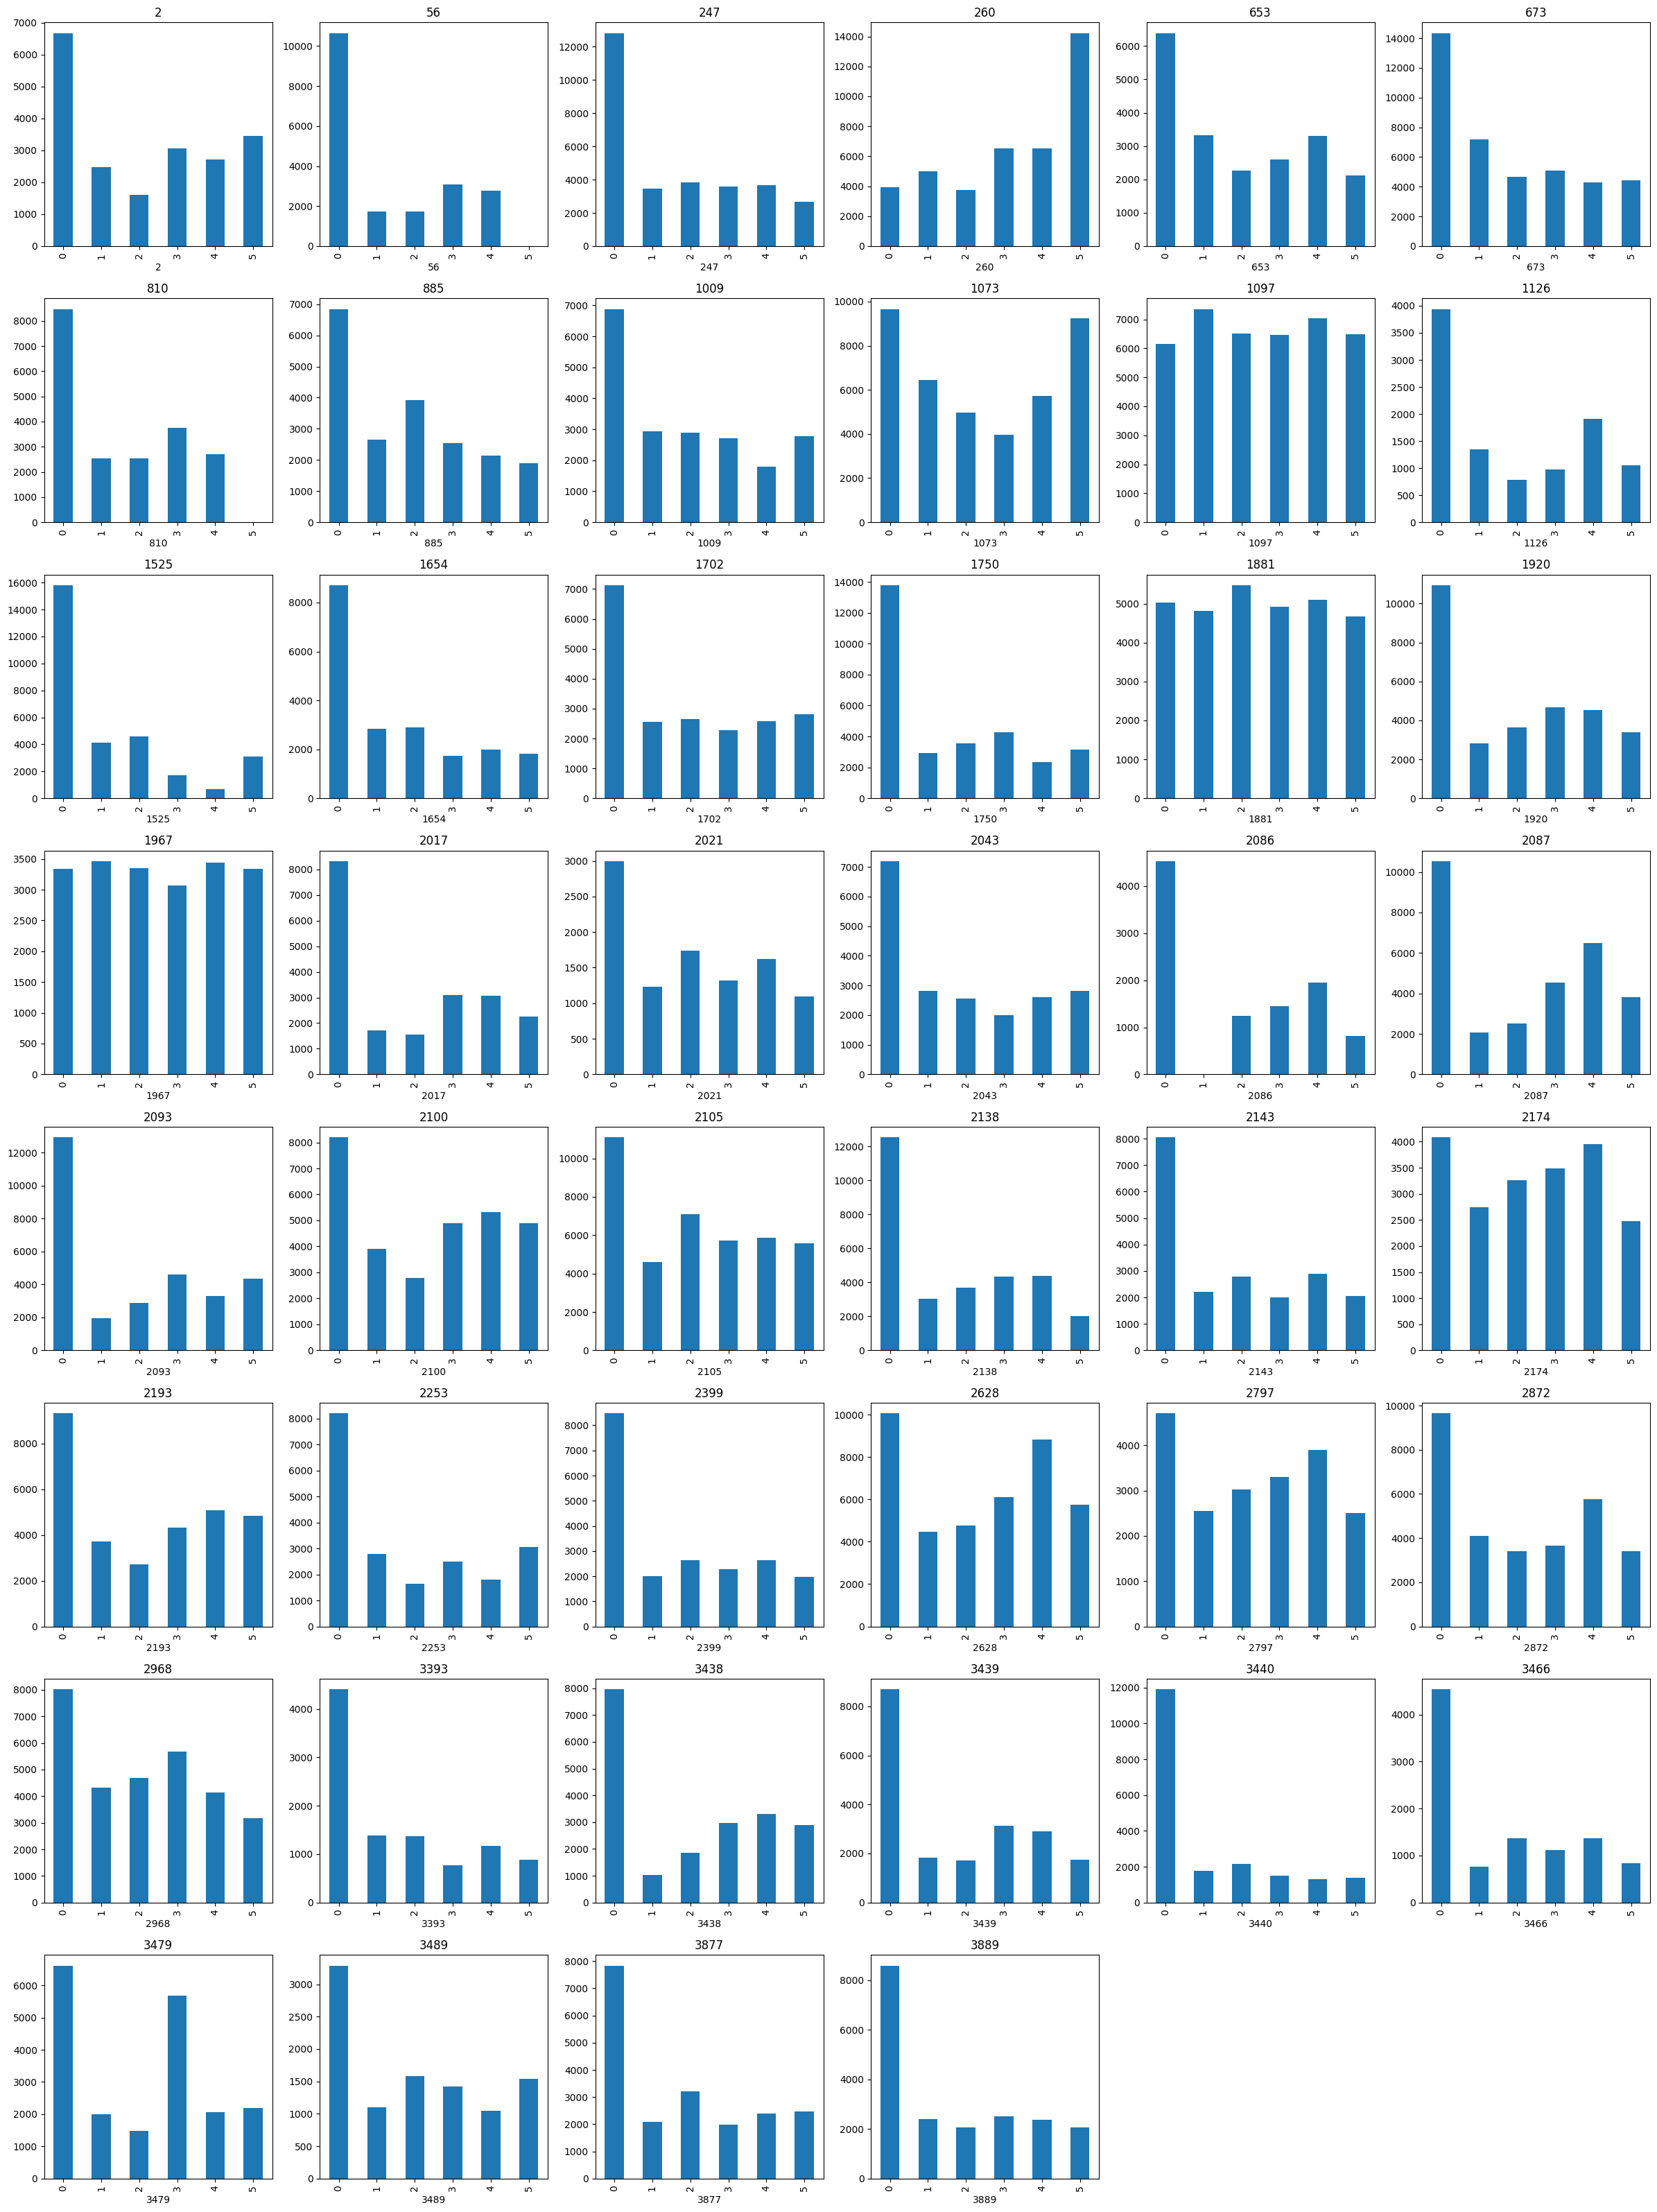

In [1236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### C0~C9の各cross集計の平均の可視化

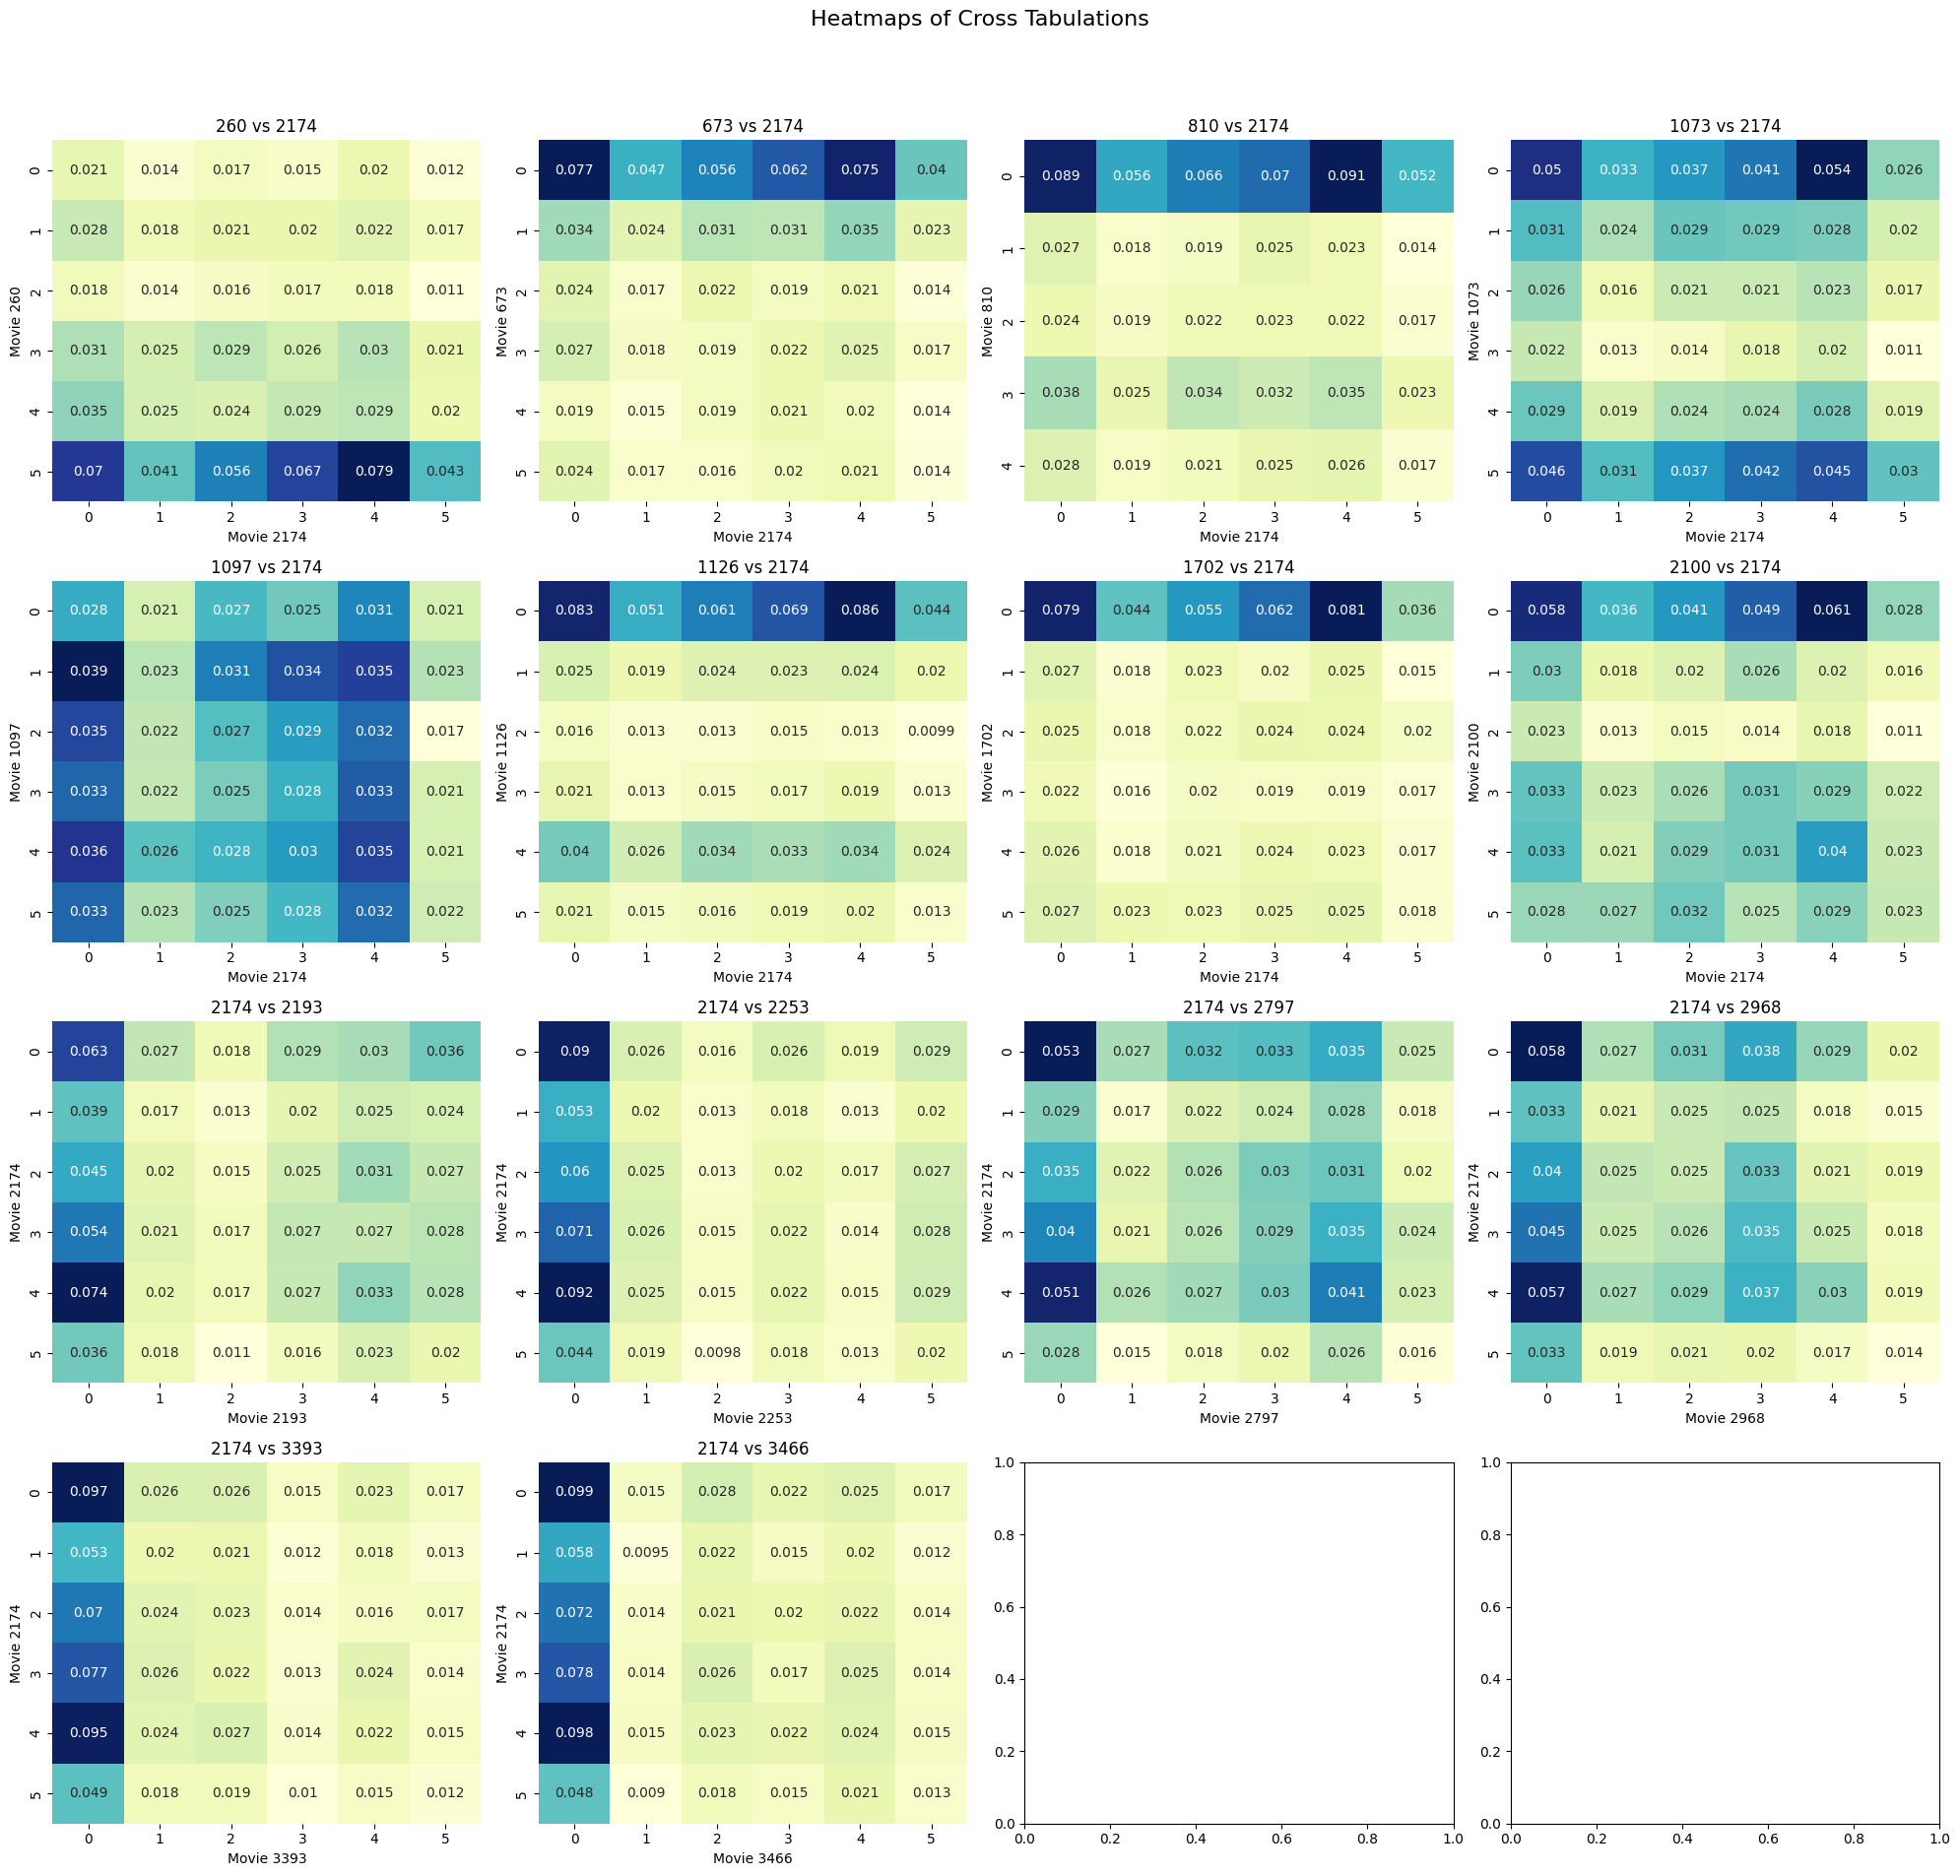

Total number of cross tabulations: 607


In [1237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12, filter_movie_id=None):
    if filter_movie_id:
        cross_tabs = {k: v for k, v in cross_tabs.items() if filter_movie_id in k}
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)
    
    axes = np.array(axes).reshape(-1)  # axes を1次元配列に変換

    for i, ((movie_id_i, movie_id_j), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        ax = axes[i]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{movie_id_i} vs {movie_id_j}")
        ax.set_ylabel(f"Movie {movie_id_i}")
        ax.set_xlabel(f"Movie {movie_id_j}")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=16, filter_movie_id="2174")

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Bbの特定の行の各映画のReviewごとのGAOZの確率の試算

In [1238]:
# Bbの指定した行を取得
target_Bb_row_index = 1
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:8]

2      0
56     0
247    2
260    1
653    3
673    2
810    3
885    0
Name: 1, dtype: object

In [1239]:
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
hidden_movie_id

'1920'

In [1240]:
# TODO:　ここの実装が複雑なので後ほど問題ないか確認する
# 各映画IDに対する target_cross を格納するリスト
cross_tabs_with_hidden_movie = []

for movie_id_i, movie_id_j in cross_tab_pairs:
    if hidden_movie_id not in (movie_id_i, movie_id_j):
        continue
    cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
    paired_movie_id = None
    if hidden_movie_id == movie_id_i:
        paired_movie_id = movie_id_j
        # hidden_movie_idを縦の配置に揃えたいので、転置する
        cross_tab = cross_tab.T
    else:
        paired_movie_id = movie_id_i
    # print(cross_tab)
    # 2143       0       1       2       3       4       5
    # 2
    # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
    # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
    # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
    # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
    # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
    # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
    column_sums = cross_tab.sum()
    # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
    normalization_factors = (1/6) / column_sums
    # データフレームの各値に正規化係数を適用
    normalized_cross_tab = cross_tab * normalization_factors
    print(normalized_cross_tab)
    review_value = target_Bb_row[paired_movie_id]
    target_cross_tab = normalized_cross_tab.loc[int(review_value)]
    cross_tabs_with_hidden_movie.append(target_cross_tab)

cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)
cross_tabs_with_hidden_movie

1920         0         1         2         3         4         5
2                                                               
0     0.070851  0.041931  0.039837  0.052184  0.047729  0.051135
1     0.014851  0.025899  0.026829  0.022165  0.022603  0.023136
2     0.010069  0.014447  0.018428  0.014741  0.015142  0.013557
3     0.023172  0.022375  0.028455  0.026469  0.029076  0.027115
4     0.019264  0.027132  0.023984  0.023671  0.024468  0.023873
5     0.028460  0.034884  0.029133  0.027437  0.027650  0.027851
1920         0         1         2         3         4         5
56                                                              
0     0.110759  0.069415  0.070596  0.081773  0.079219  0.076628
1     0.009517  0.022199  0.019783  0.015709  0.015690  0.014147
2     0.010805  0.016737  0.016260  0.015817  0.013825  0.021220
3     0.018713  0.029774  0.032520  0.026253  0.030283  0.030946
4     0.016874  0.028541  0.027507  0.027114  0.027650  0.023725
1920         0         1 

,0,0,2,2,3,0,1,2,4,0,...,1,0,0,0,2,0,0,4,0,5
1920,,,,,,,,,,,,,,,,,,,,,
0,0.070851,0.110759,0.016476,0.015732,0.025011,0.069471,0.020460,0.016368,0.030115,0.109241,...,0.028598,0.091922,0.077149,0.077605,0.013057,0.090661,0.102023,0.025517,0.091494,0.009563
1,0.041931,0.069415,0.027630,0.024770,0.034708,0.044045,0.029422,0.025546,0.028365,0.067653,...,0.025722,0.051581,0.043164,0.044602,0.019732,0.050071,0.038231,0.032946,0.053735,0.014094
2,0.039837,0.070596,0.023355,0.019684,0.035637,0.049593,0.026152,0.026694,0.028320,0.068835,...,0.032385,0.046593,0.042818,0.039739,0.019377,0.053467,0.052710,0.026287,0.053117,0.013008
3,0.052184,0.081773,0.022329,0.022108,0.036690,0.051216,0.025931,0.020874,0.030235,0.082742,...,0.029374,0.061435,0.053368,0.047150,0.017000,0.059508,0.058855,0.026469,0.067463,0.012912
4,0.047729,0.079219,0.022481,0.020344,0.035659,0.050033,0.026114,0.023810,0.029515,0.081413,...,0.028747,0.060626,0.056836,0.057752,0.017665,0.063513,0.051130,0.029296,0.066162,0.011850
5,0.051135,0.076628,0.025163,0.021073,0.031830,0.053640,0.027262,0.017978,0.027999,0.073386,...,0.027262,0.058263,0.050840,0.045455,0.015326,0.056734,0.060419,0.030209,0.062776,0.010168


In [1241]:
# 各カラムごとに総和が1になるように確率を正規化
def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

# クロス集計表を列ごとに正規化
normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
normalized_cross_tabs_with_hidden_movie

,0,0,2,2,3,0,1,2,4,0,...,1,0,0,0,2,0,0,4,0,5
1920,,,,,,,,,,,,,,,,,,,,,
0,0.233317,0.226783,0.119880,0.127170,0.125348,0.218464,0.131710,0.124689,0.172531,0.226046,...,0.166181,0.248156,0.237987,0.248494,0.127817,0.242439,0.280770,0.149465,0.231780,0.133573
1,0.138082,0.142130,0.201044,0.200225,0.173941,0.138507,0.189405,0.194609,0.162506,0.139990,...,0.149472,0.139250,0.133151,0.142816,0.193155,0.133895,0.105213,0.192977,0.136125,0.196863
2,0.131188,0.144549,0.169940,0.159113,0.178599,0.155955,0.168352,0.203351,0.162246,0.142435,...,0.188188,0.125784,0.132084,0.127246,0.189675,0.142977,0.145060,0.153975,0.134558,0.181690
3,0.171847,0.167434,0.162472,0.178705,0.183878,0.161057,0.166929,0.159014,0.173216,0.171212,...,0.170691,0.165851,0.164626,0.150974,0.166412,0.159133,0.161971,0.155038,0.170902,0.180341
4,0.157175,0.162204,0.163574,0.164448,0.178712,0.157337,0.168106,0.181379,0.169094,0.168463,...,0.167048,0.163669,0.175324,0.184923,0.172921,0.169841,0.140712,0.171596,0.167606,0.165512
5,0.168391,0.156900,0.183091,0.170339,0.159521,0.168680,0.175499,0.136957,0.160407,0.151854,...,0.158419,0.157290,0.156829,0.145547,0.150020,0.151715,0.166274,0.176948,0.159029,0.142021


In [1242]:
# # TODO: ここがSUMでいいのかは要検討
hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
hidden_movie_probabilities


1920
0    0.186852
1    0.160936
2    0.155809
3    0.167262
4    0.166762
5    0.162378
dtype: float64

In [1243]:
hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
hidden_movie_histgram

1920
0    0.364667
1    0.094167
2    0.121767
3    0.155533
4    0.150933
5    0.112933
Name: proportion, dtype: float64

In [1244]:
probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
probability

1920
1    1.709056
5    1.437824
2    1.279568
4    1.104873
3    1.075411
0    0.512392
dtype: float64

In [1245]:
probability.index[0]

1

## 正規のMAE ATTACK

In [1246]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([4, 0, 0, 0, 0, 2, 5, 1, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 1, 0, 0, 5,
       2, 0, 4, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3,
       2, 0, 1, 0, 2, 0])

In [1247]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[4, 0, 0, 0, 0, 2, 5, 1, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 1, 0, 0, 5, 2, 0, 4, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3, 2, 0, 1, 0, 2, 0]


マッチングの成功率: <span style='color:yellow'>30</span> / 50

In [1248]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>24</span>

## MAE ATTACK + ゴミ方式

In [1249]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

prob_0 = []
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)

    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Probの上位MAX_0_COUNTを求める
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0を設定
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answerを決定
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([4, 0, 0, 0, 0, 2, 5, 0, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 0, 0, 0, 5,
       2, 0, 0, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3,
       2, 0, 1, 0, 0, 0])

In [1250]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[4, 0, 0, 0, 0, 2, 5, 0, 1, 0, 0, 0, 0, 0, 0, 2, 5, 4, 0, 0, 0, 5, 2, 0, 0, 1, 0, 1, 1, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 0, 0, 1, 3, 2, 0, 1, 0, 0, 0]


マッチングの成功率: <span style='color:yellow'>29</span> / 50

In [1251]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>28</span>

## ゴミ方式をガチでランダムでやったらどうなるのか調査

In [1252]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[4 0 0 0 0 1 2 0 4 1 2 0 0 0 1 2 4 4 2 0 5 5 0 0 4 2 0 1 1 0 0 1 5 0 4 5 0
 5 0 2 0 5 1 0 0 0 1 0 2 3]
[0, 0, 0, 0, 4, 0, 0, 4, 1, 0, 0, 0, 5, 2, 1, 4, 5, 5, 0, 2, 0, 4, 0, 0, 0, 0, 5, 5, 4, 0, 3, 0, 0, 2, 2, 4, 1, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 5, 0, 0]


マッチングの成功率: <span style='color:yellow'>13</span> / 50